In [26]:
from seaborn import *
import seaborn as sns
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from datascience import *
from numpy import *
import numpy as np
import pandas as pd
import datetime

In [27]:
## csv file for each day
day_1 = Table.read_table('C:/Users/dusti/OneDrive/Desktop/CMEdata/daily-standings-2019-10-07.csv')
day_2 = Table.read_table('C:/Users/dusti/OneDrive/Desktop/CMEdata/daily-standings-2019-10-08.csv')
day_3 = Table.read_table('C:/Users/dusti/OneDrive/Desktop/CMEdata/daily-standings-2019-10-09.csv')
day_4 = Table.read_table('C:/Users/dusti/OneDrive/Desktop/CMEdata/daily-standings-2019-10-10.csv')
day_5 = Table.read_table('C:/Users/dusti/OneDrive/Desktop/CMEdata/daily-standings-2019-10-11.csv')
day_6 = Table.read_table('C:/Users/dusti/OneDrive/Desktop/CMEdata/daily-standings-2019-10-14.csv')
day_7 = Table.read_table('C:/Users/dusti/OneDrive/Desktop/CMEdata/daily-standings-2019-10-15.csv')
day_8 = Table.read_table('C:/Users/dusti/OneDrive/Desktop/CMEdata/daily-standings-2019-10-16.csv')
day_9 = Table.read_table('C:/Users/dusti/OneDrive/Desktop/CMEdata/daily-standings-2019-10-17.csv')
day_10 = Table.read_table('C:/Users/dusti/OneDrive/Desktop/CMEdata/daily-standings-2019-10-18.csv')
day_11 = Table.read_table('C:/Users/dusti/OneDrive/Desktop/CMEdata/daily-standings-2019-10-22.csv')
day_12 = Table.read_table('C:/Users/dusti/OneDrive/Desktop/CMEdata/daily-standings-2019-10-23.csv')
day_13 = Table.read_table('C:/Users/dusti/OneDrive/Desktop/CMEdata/daily-standings-2019-10-24.csv')
day_14 = Table.read_table('C:/Users/dusti/OneDrive/Desktop/CMEdata/daily-standings-2019-10-25.csv')
day_17 = Table.read_table('C:/Users/dusti/OneDrive/Desktop/CMEdata/daily-standings-2019-10-31.csv')

In [28]:
## reads csv into list of tables
oneday = datetime.timedelta(1)
filename = 'C:/Users/dusti/OneDrive/Desktop/CMEdata/daily-standings-{}.csv'
start_date = datetime.date(2019,10,7)
tables = []
for i in np.arange(25):
    date = start_date +i*oneday
    if date.weekday() in range(5):
        myfile = filename.format(str(date))
        mytable = Table.read_table(myfile)
        tables.append(mytable)

In [29]:
top10 = tables[-1].column("Account Name")[:10]

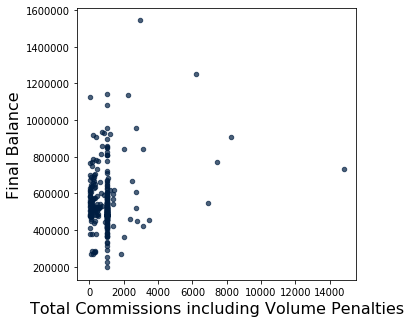

In [30]:
## Scatter plot of Commissions by Final Balance
commissions_balance = day_17.scatter("Total Commissions including Volume Penalties","Final Balance") 
commissions_balance

In [31]:
## percent return for top 10 teams final placement, change to dayi
percent = day_17.column("Final Balance") - 500000
array = percent/500000
day17withpercentarray = array*100
day17withpercent = day_17.with_column("Percent Return",day17withpercentarray).set_format("Percent Return",NumberFormatter)
day17withpercent.drop("Total Commissions including Volume Penalties","Trading End Balance").show(10)

Account Name,Final Balance,Percent Return
University of Colorado Boulder Edge U1,1.54464e+06,208.93
University of Illinois at Urbana-Champaign Team Aster 12,1.25206e+06,150.41
Southern Illinois University Saluki U1,1.14234e+06,128.47
Simon Fraser University The Fall U1,1.13825e+06,127.65
University of Michigan AMaizing Blue U1,1.12716e+06,125.43
CUCEA TEQUILA SUNSET G2,1.08142e+06,116.28
university of connecticut MMZZZ G5,958955,91.79
CUCEA BLUE PIPS U2,955400,91.08
University of Colorado Boulder CU Undergrad 6 U2,936107,87.22
University Of Texas at Dallas Rainmakers G1,927840,85.57


In [32]:
##sample day
a = day_14.column("Account Name")[:10]
b = day_14.column("Final Balance")[:10]
c = Table().with_columns("Account Name",a,"Final Balance",b)
c

Account Name,Final Balance
University of Illinois at Urbana-Champaign Team Aster 12,1621398
University of Colorado Boulder Edge U1,1290108
University of Illinois at Urbana-Champaign Gambler G8,1204544
University of Michigan AMaizing Blue U1,1176474
Southern Illinois University Saluki U1,1146338
Stevens Institute of Technology ChasingAlpha G3,1104098
CUCEA TEQUILA SUNSET G2,1016157
Simon Fraser University The Fall U1,1010848
CUCEA BLUE PIPS U2,896745
Johns Hopkins University Hopkins Trading U1,867817


In [33]:
top10[0]

'University of Colorado Boulder Edge U1'

In [34]:
tables[0].where("Account Name",are.equal_to(top10[0])).column("Final Balance")

array([467500])

In [35]:
##gets balance after every day, for each particular team
def get_balance(team_name,tables):
    balarray = make_array()
    for i in range(len(tables)):
        balance = tables[i].where("Account Name",are.equal_to(team_name)).column("Final Balance")
        balarray = np.append(balarray, balance)
    return (balarray)
get_balance(top10[0],tables)

array([ 467500.,  505038.,  504038.,  659740.,  696948.,  655768.,
        961963.,  913863.,  912863.,  910813., 1048070., 1236073.,
       1292128., 1291108., 1290108., 1289108., 1180940., 1410608.,
       1544643.])

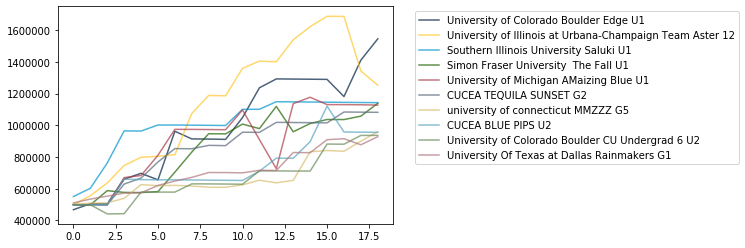

In [36]:
final_table = Table()
for name in top10:
    balarray = get_balance(name, tables)
    final_table = final_table.with_column(name, balarray)
final_table.plot()

In [37]:
final_table

University of Colorado Boulder Edge U1,University of Illinois at Urbana-Champaign Team Aster 12,Southern Illinois University Saluki U1,Simon Fraser University The Fall U1,University of Michigan AMaizing Blue U1,CUCEA TEQUILA SUNSET G2,university of connecticut MMZZZ G5,CUCEA BLUE PIPS U2,University of Colorado Boulder CU Undergrad 6 U2,University Of Texas at Dallas Rainmakers G1
467500,499000,550365,497250,499663,499000,499960,499000,499304,510595
505038,555825,602568,498183,499638,498000,509020,498750,498749,534293
504038,635883,761763,587555,498638,497813,510630,498448,440917,553043
659740,746038,964413,576500,669958,628938,539048,660313,442324,571918
696948,798123,963413,575500,682960,666727,625668,656913,578699,573468
655768,804240,1.00134e+06,581438,810623,768342,619040,655913,578497,620358
961963,813933,1.00143e+06,704155,973980,852744,620958,655850,578472,648213
913863,1.07389e+06,1.00043e+06,830840,973818,851744,616723,654850,630432,671213
912863,1.18791e+06,999433,946485,972818,873107,609160,653850,630152,701858
910813,1.18545e+06,998308,945485,971818,871357,609060,652850,629152,701658


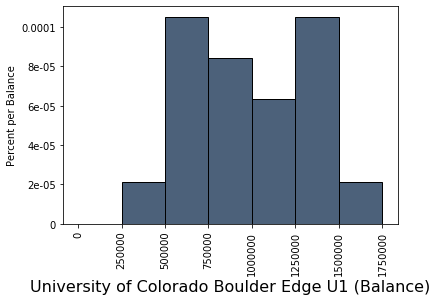

In [38]:
final_table.hist("University of Colorado Boulder Edge U1", unit = "Balance", bins = np.arange(0,1800000,250000))